In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
import lightgbm as lgbm

In [0]:
%matplotlib inline
sb.set_palette('hls')

In [0]:
df = pd.read_csv('Telco.csv')

In [292]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **customerID** : Customer ID
* **gende**r : Whether the customer is a male or a female
* **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
* **Partner** : Whether the customer has a partner or not (Yes, No)
* **Dependents** : Whether the customer has dependents or not (Yes, No)
* **tenure** : Number of months the customer has stayed with the company
* **PhoneService** : Whether the customer has a phone service or not (Yes, No)
* **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : The amount charged to the customer monthly
* **TotalCharges** : The total amount charged to the customer
* **Churn** : Whether the customer churned or not (Yes or No)

In [293]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [295]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [0]:
df.drop('customerID',axis=1,inplace=True)

In [0]:
df.rename(columns = {'gender':'Gender','tenure':'Tenure'},inplace=True)

**Class Distribution in Traget variable**

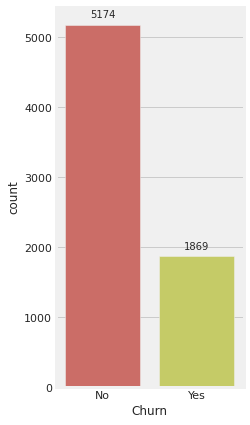

In [298]:
plt.figure(figsize = (3,7))
b = sb.countplot(df['Churn'])
#values on top of bars
for p in b.patches:
    b.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
    p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize = 10)
plt.show()

**From the aboive graph we can see that around 26 percent of our data is under churn = Yes and rest 74% is under churn = No, which means our data is imbalanced and hence we may have to take care of this issue which making train-test splits and choosing evaluation metric because Accuracy may not be the right evaluation metric in such sinarios**

# Null value Imputation

In [0]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [300]:
df['TotalCharges'].isnull().sum()

11

In [301]:
#I want to check the specific 11 rows which have null values
df[df.isna().any(axis=1)]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**we can see from the above dataframe that all the 11 rows which have "NAN" in "Totalcharges" column have  tenure as "0",** **This is totally meaning full because we can come to an understanding that all these 11 customers are newly joined and**
**their tenure periord is less than a month, We can deal with senario by imputing "Totalcharges" either with zeros or we**
**can copy the value of "monthlycharges" into "Totalcharges" column. we have decided to copy values of "monthlycharges"**

In [0]:
#imputing NAN of "Totalcharges" by copying the value of "monthlycharges" into "Totalcharges" column
df.TotalCharges.fillna(df.MonthlyCharges, inplace=True)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Statistical tests for understanding feature importance

**we know that correlation does not measure all relationships,correlation is for measuring the linear relationship between two  continuous variables. There fore for understanding  the relation between categorical variables we prefer statistical test like chi-square and cramers v test.**

**In Data we have 17 categorical columns out of which based on our intution and domain knowledge we can say that some of the categorical variables like "PhoneService", "MultipleLines", "InternetService" and "TechSupport" etc are strong predictors but there are some variables which we think dont help in prediction, But instead of simply dropping those variables we will run two statistical tests ( chi-square test  and cramers v test) to decide the significance and strength of their relation with target variable and decide whether to include them in our model or not.**

**These are the variables which we will test for relation with target variable.**

**1) Gender**

**2) Dependents**

**3) Partner**

**2) PaymentMethod**

**3) PaperlessBilling**

## chi-square test for feature understanding feature importance

**I am trying to check the relation ship between some  of the the categorical features and target and hence I chose Pearsons chi square test for independence** 

**I am choosing my aplpha = 0.05, which is a default value**

**we are first trying to see if the target or churn depend on Gender**

**Null Hypothesis - There is no relationship between churn and Gender**


**Alternate Hypothesis - There is a relationship between the churn and gender**

In [304]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [0]:
def graph1(var):
    import seaborn as sns
    sns.set(style="darkgrid")
    sns.set_palette("hls", 3)
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sns.countplot(x= var, hue="Churn", data=df)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/df.shape[0]), ha="center")



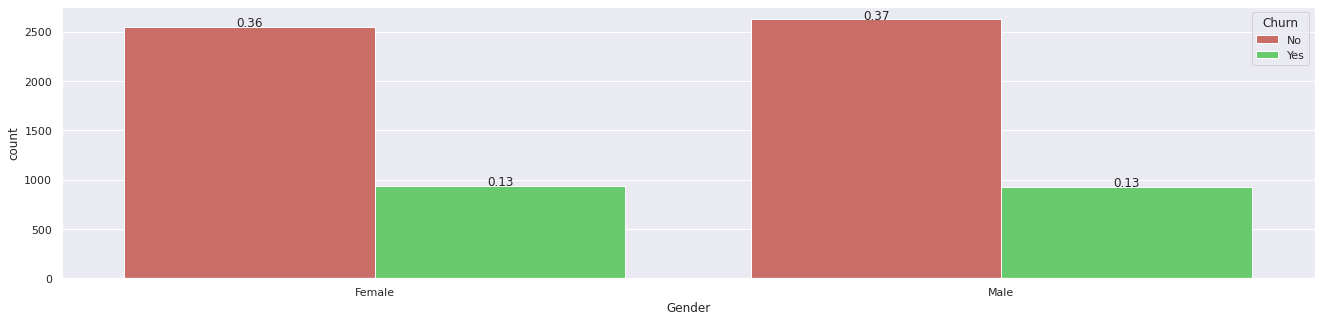

In [306]:
graph1("Gender")

**From the above graph we can see that churn in both male and female is same**
**From visualization we can see that there is no relation between Gender and churn but let us see**
**if that holds good in the case of our statistical testing** 

In [0]:
gender_crosstab = pd.crosstab(index=df['Gender'],columns=df['Churn'])

In [308]:
gender_crosstab

Churn,No,Yes
Gender,,
Female,2549,939
Male,2625,930


In [309]:
gender_crosstab.iloc[0].values


array([2549,  939])

In [0]:
from scipy import stats
(chi2_1, p, dof,_) = stats.chi2_contingency([gender_crosstab.iloc[0].values,gender_crosstab.iloc[1].values])

In [311]:
print ("chi2_1     : " ,chi2_1)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2_1     :  0.4840828822091383
p-value  :  0.48657873605618596
Degree for Freedom :  1


**From the above result we can see that chi square value is 0.4 which is less than 0.05 and hence we approve null hypothesis and reject alternate hypothesis,That is we can conclude that there is no significant relation between gender and churn and hence we can drop this feature while building our model**

In [312]:
pd.crosstab(index=df['Gender'],columns=df['Churn'], margins=True)


Churn,No,Yes,All
Gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


**Is there any relationship between users who have opted for paperless billing to user who have churned?**

**Null Hypothesis =  There is no relation between type of billing and churn**


**Alternate Hypothesis = There is significant relation between billing and churn**

In [313]:
df['PaperlessBilling'].value_counts()


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

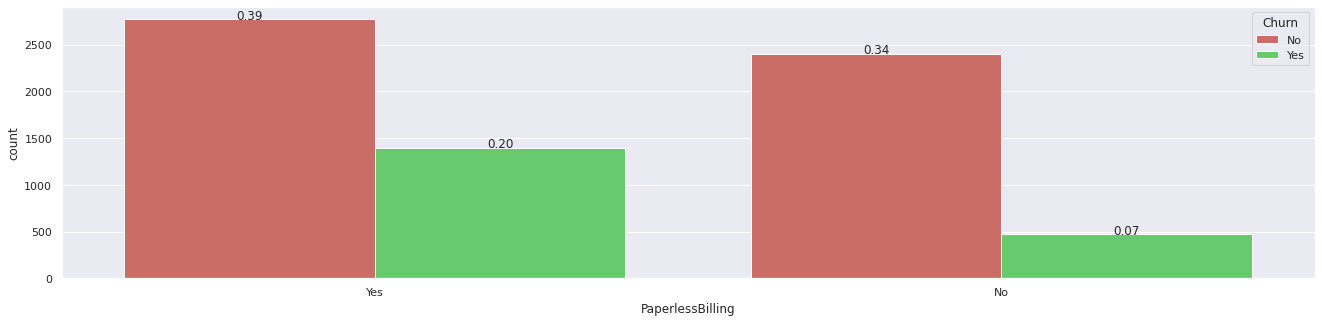

In [314]:
graph1("PaperlessBilling")

**From the above graph we can see that churn in customers who opted for paperless billing is more than others who hasn't opted for it**


**From visualization we can see that there is some relation between type of billing and churn but this does not imply any causation**

In [0]:
pb_churn_ct=pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'])


In [316]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [317]:
pb_churn_ct.iloc[0].values

array([2403,  469])

In [0]:
(chi2_2, p, dof,_) = stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values])

In [319]:
print ("chi2_2     : " ,chi2_2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2_2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1


**observing above chi square value we can approve our null hypothesis, that is there is significant relation between type of billing and churn**

**In general our intution says that there should not be any relation between paperless billing and churn but our results shows opposite. That is beacuase there might not be a causation effect bewteen these variables but there is some correlation and hence i will include this variable in my model**

**Is there any relationship between PaymentMethod and churn?**

**Null Hypothesis =  There is no relation between type of PaymentMethod and churn**


**Alternate Hypothesis = There is significant relation between PaymentMethod and churn**

In [320]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

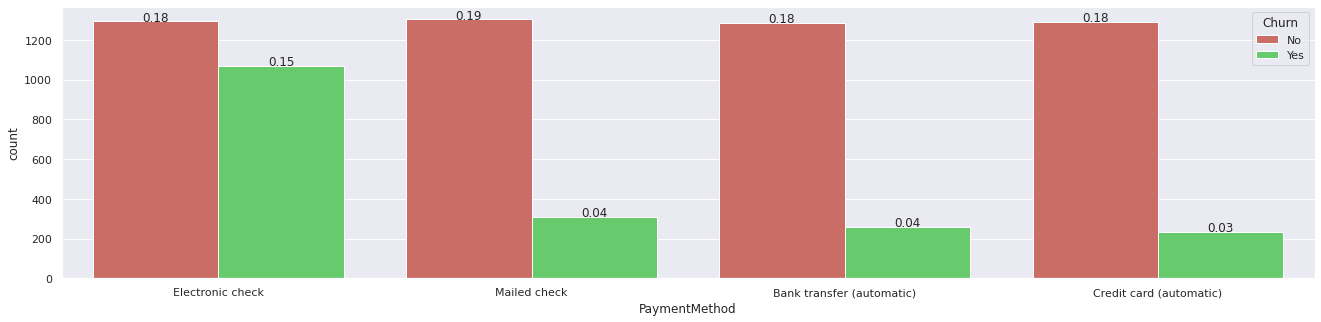

In [321]:
graph1("PaymentMethod")

In [322]:

pm_churn_ct=pd.crosstab(index=df['PaymentMethod'],columns=df['Churn'])
print(pm_churn_ct)


Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


In [323]:
(chi2_3, p, dof,_) = stats.chi2_contingency([pm_churn_ct.iloc[0].values,pm_churn_ct.iloc[1].values,pm_churn_ct.iloc[2].values,pm_churn_ct.iloc[3].values])

print ("chi2_3     : " ,chi2_3)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2_3     :  648.1423274814
p-value  :  3.6823546520097993e-140
Degree for Freedom :  3


**even in this case we can reject the null hypothesis and say that there is significant relation between Payment methond and churn**


In [0]:
# For Dependents

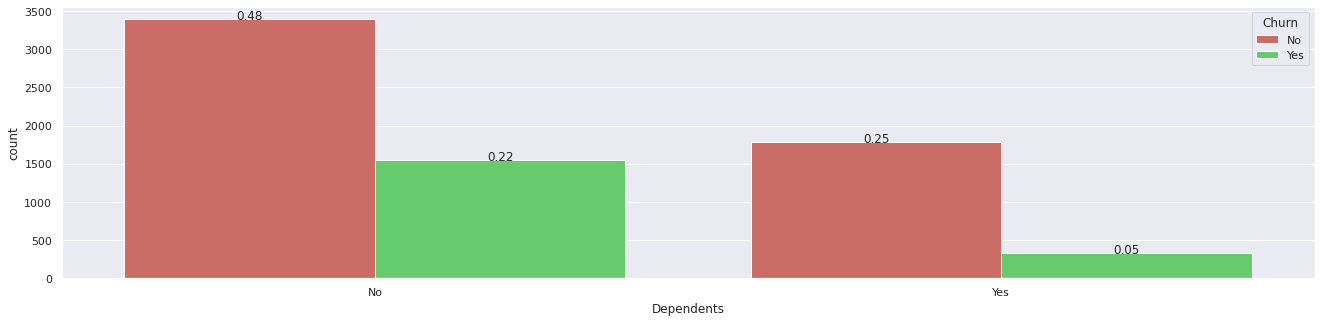

In [325]:
graph1("Dependents")

In [326]:
dep_churn_ct=pd.crosstab(index=df['Dependents'],columns=df['Churn'])
print(dep_churn_ct)

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


In [327]:
(chi2_4, p, dof,_) = stats.chi2_contingency([dep_churn_ct.iloc[0].values,dep_churn_ct.iloc[1].values])

print ("chi2_4     : " ,chi2_4)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2_4     :  189.12924940423474
p-value  :  4.9249216612154196e-43
Degree for Freedom :  1


**even in this case we can reject the null hypothesis and say that there is significant relation between Dependents and churn**

In [0]:
#for Partner

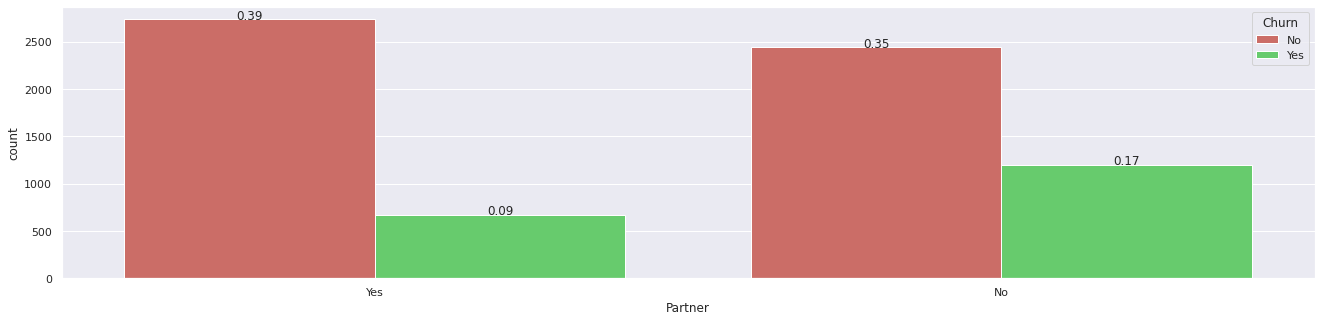

In [329]:
graph1("Partner")

In [330]:
pat_churn_ct=pd.crosstab(index=df['Partner'],columns=df['Churn'])
print(pat_churn_ct)

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


In [331]:
(chi2_5, p, dof,_) = stats.chi2_contingency([pat_churn_ct.iloc[0].values,pat_churn_ct.iloc[1].values])

print ("chi2_5    : " ,chi2_5)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2_5    :  158.7333820309922
p-value  :  2.1399113440759935e-36
Degree for Freedom :  1


**even in this case we can reject the null hypothesis and say that there is significant relation between variable patner and churn**

# Cramer's V test 

**We now know that variables**

**1) Dependents**

**2) Partner**

**3) PaymentMethod**

**4) PaperlessBilling**

**have sinificant relation with target , but now lets see how strong is that relation using cramers v test**

# V = SQRT(CHI2/n*(min(C,R)-1

## v is a value betwee 0 and 1, stronger the relation, closer the value to 1

In [332]:
import numpy as np
print("V for Gender" , np.sqrt(chi2_1/(df.shape[0])))
print("V for paperless billing", np.sqrt(chi2_2/(df.shape[0])))
print("V for paymentMethod", np.sqrt(chi2_3/(df.shape[0])))
print("V for Dependents",np.sqrt(chi2_4/(df.shape[0])))
print("V for Partners",np.sqrt(chi2_5/(df.shape[0])))

V for Gender 0.008290505631771371
V for paperless billing 0.19149814355338285
V for paymentMethod 0.30335862555407056
V for Dependents 0.1638703967886369
V for Partners 0.15012578474988478


**we can observe from above results that variables Gender, Paperless Billing, Dependends, Partners have weak relationship with target and hence we will be dropping these variables**

In [0]:
df1 = df.drop(['Gender',"PaperlessBilling","Dependents","Partner"], axis=1)

In [334]:
df1.head()

,SeniorCitizen,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [0]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

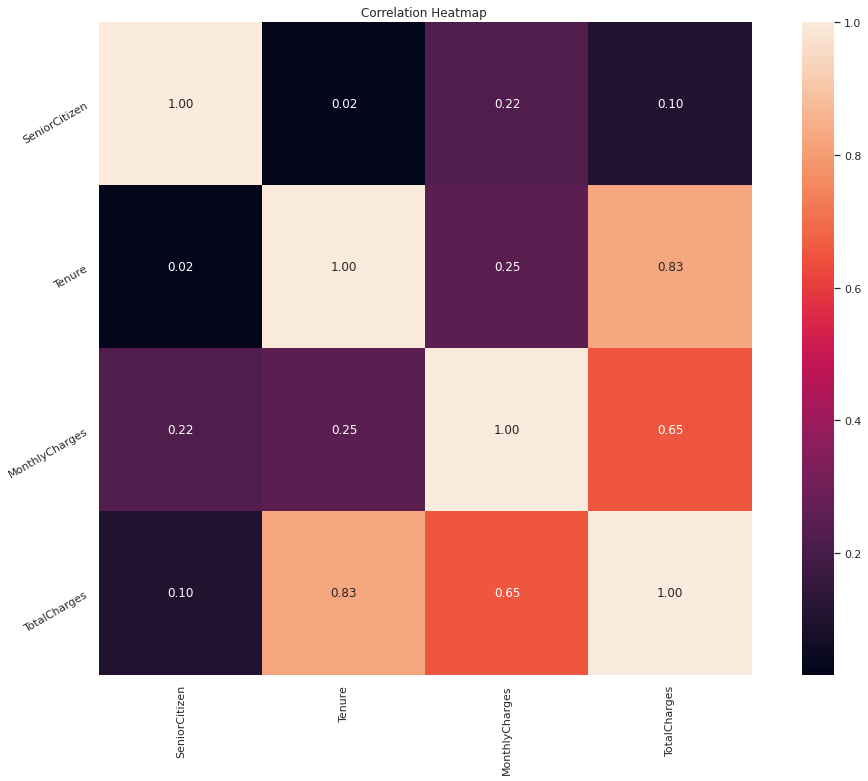

In [336]:
#Checking the correlation between numerical variables
correlation = df1.corr()

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap ')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Since there is a high correlation between "TotalCharges" and "Tenure" lets come up with a new column named "netcharges" which is**


**NetCharges = TotalCharges/Tenure**

In [0]:
df1 = df1[df1.Tenure != 0]

In [338]:
df1.head()

,SeniorCitizen,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [339]:
df1.isna().sum()

SeniorCitizen       0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [340]:
len(df1)

7032

In [0]:
df1["NetCharges"] = df1["TotalCharges"]/df1["Tenure"]

In [342]:
df1.isna().sum()

SeniorCitizen       0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
NetCharges          0
dtype: int64

In [343]:
df1.head()

,SeniorCitizen,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NetCharges
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,29.850000
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No,55.573529
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,54.075000
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,75.825000


In [0]:
#Now drop tenure and total charges columns

In [0]:
df2 = df1.drop(['TotalCharges',"Tenure"], axis=1)

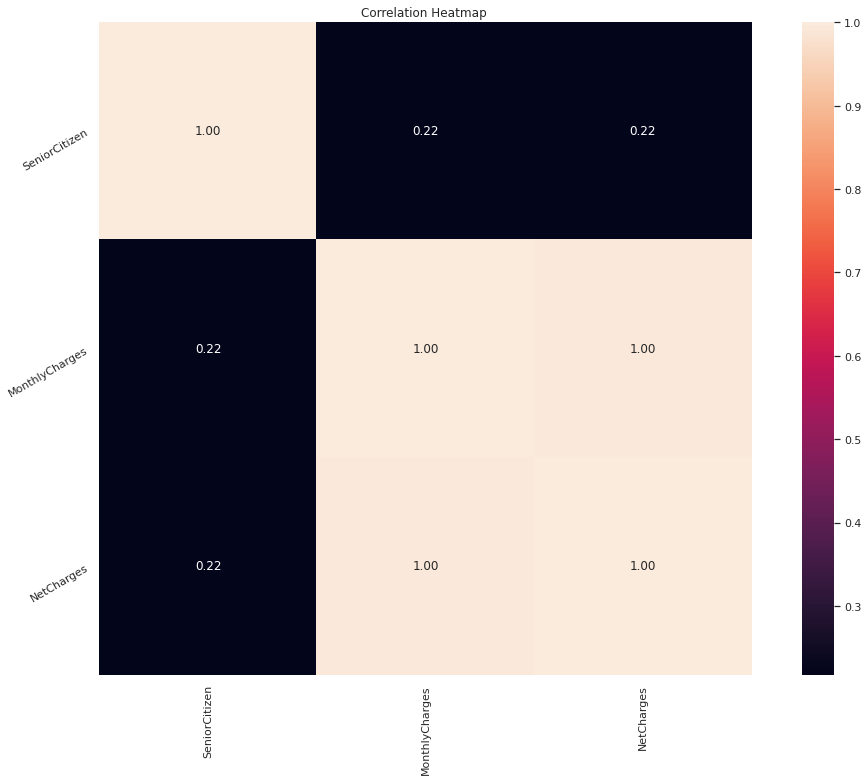

In [346]:
#Checking the correlation between numerical variables
import seaborn as sns
correlation = df2.corr()

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap ')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Now if we see the correlation between Monthy charges and Netcharges is 1, which is really high. There fore lets drop monthly charges column**

In [0]:
df2 = df2.drop(["MonthlyCharges"], axis=1)

In [348]:
df2.head()

,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn,NetCharges
0,0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,No,29.850000
1,0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,No,55.573529
2,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,Yes,54.075000
3,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),No,40.905556
4,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,Yes,75.825000


# **Exploratory Data Analysis**

**Univeriate** **Analysis**

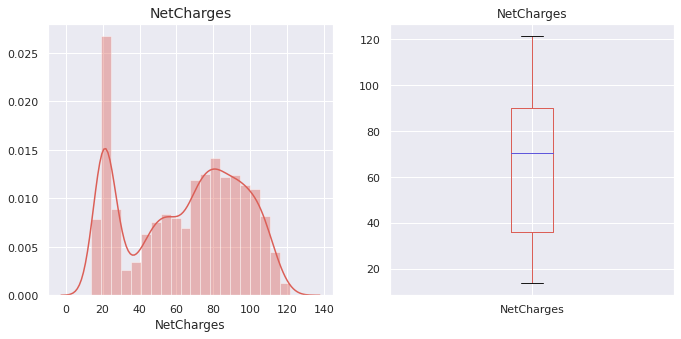

In [349]:
fig = plt.figure(figsize=(10,5))

#  subplot #1
fig.add_subplot(121)
plt.title('NetCharges', fontsize=14)
sns.distplot(df3['NetCharges'])

#  subplot #2
fig.add_subplot(1,2,2)
df2['NetCharges'].plot.box(title= 'NetCharges')


plt.show()

**we can observe from the above plot that net charges do not have any outliers but the distribution is not normal and hence we may have to normalize our data while feeding to the models**



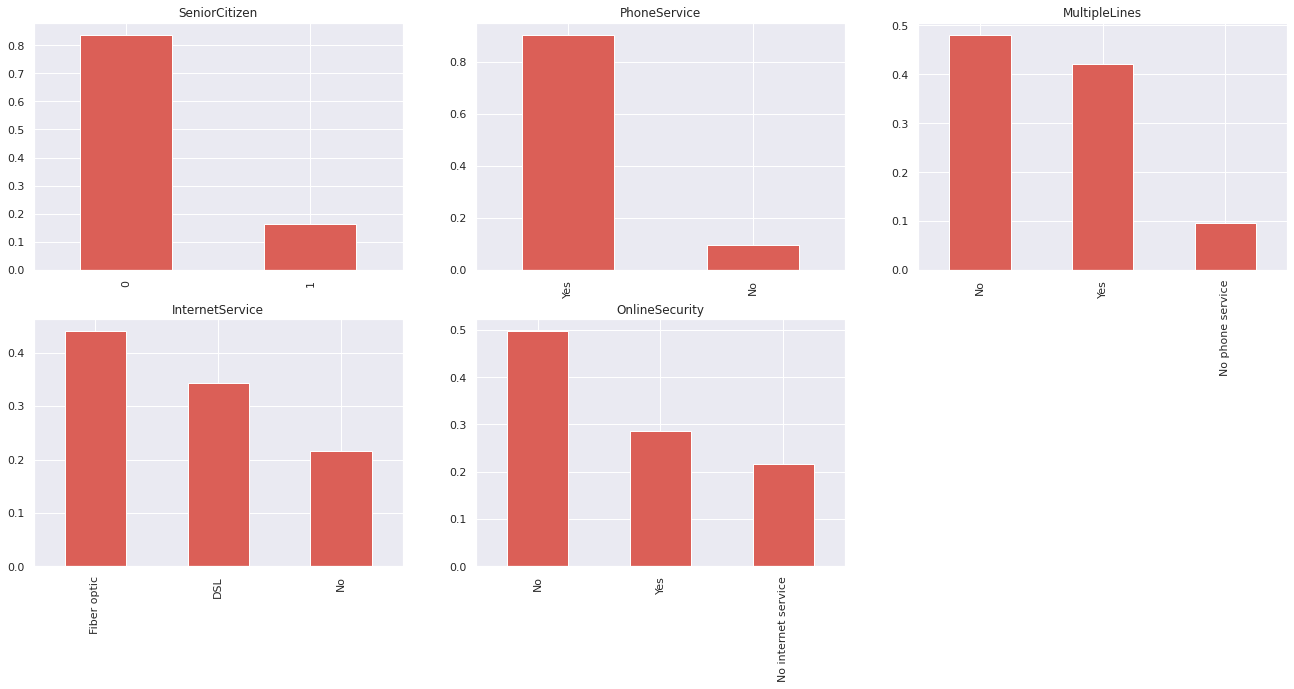

In [350]:
fig = plt.figure(figsize=(14,12))

#  subplot #1
fig.add_subplot(231)
plt.title('SeniorCitizen', fontsize=14)
df2['SeniorCitizen'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'SeniorCitizen')

#  subplot #2
fig.add_subplot(2,3,2)
df2['PhoneService'].value_counts(normalize=True).plot.bar(title= 'PhoneService')

#  subplot #3
fig.add_subplot(233)
df2['MultipleLines'].value_counts(normalize=True).plot.bar(title= 'MultipleLines') 

fig.add_subplot(234)
df2['InternetService'].value_counts(normalize=True).plot.bar(title= 'InternetService') 

fig.add_subplot(235)
df2['OnlineSecurity'].value_counts(normalize=True).plot.bar(title= 'OnlineSecurity') 


plt.show()

**It can be inferred from the above bar plots that:**

**80% customers in the dataset are senior citizens.**

**Around 85% of the customers in the dataset have phone service.**

**Around 47% customers in the dataset have multiple phone lines.**

**Around 40 % customers in the dataset have internet service.**

**Around 50% customers in the dataset donot have online security.**

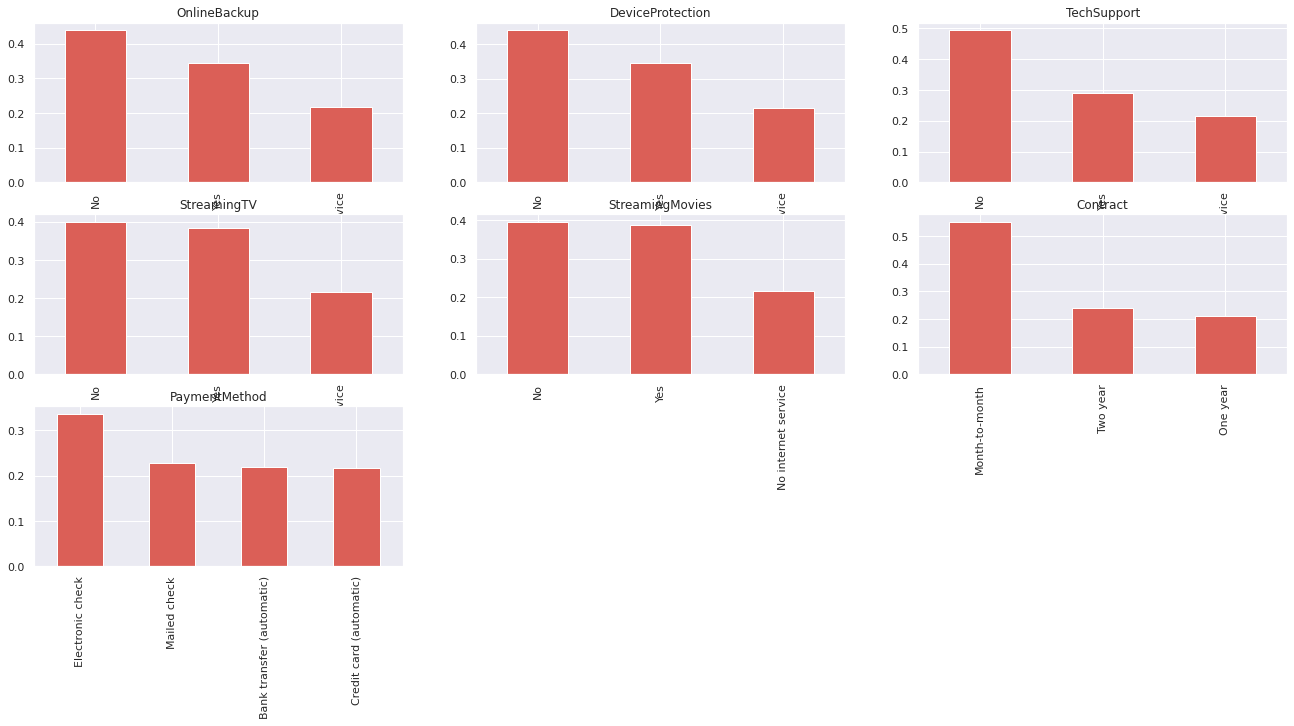

In [351]:
fig = plt.figure(figsize=(14,12))

#  subplot #1
fig.add_subplot(331)
plt.title('OnlineBackup', fontsize=14)
df2['OnlineBackup'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'OnlineBackup')

#  subplot #2
fig.add_subplot(3,3,2)
df2['DeviceProtection'].value_counts(normalize=True).plot.bar(title= 'DeviceProtection')

#  subplot #3
fig.add_subplot(333)
df2['TechSupport'].value_counts(normalize=True).plot.bar(title= 'TechSupport') 

fig.add_subplot(334)
df2['StreamingTV'].value_counts(normalize=True).plot.bar(title= 'StreamingTV') 

fig.add_subplot(335)
df2['StreamingMovies'].value_counts(normalize=True).plot.bar(title= 'StreamingMovies') 

fig.add_subplot(336)
df2['Contract'].value_counts(normalize=True).plot.bar(title= 'Contract') 

fig.add_subplot(337)
df2['PaymentMethod'].value_counts(normalize=True).plot.bar(title= 'PaymentMethod') 


plt.show()

It can be inferred from the above bar plots that:

45% customers in the dataset opted for  online backup.

Around 42% of the customers in the dataset have device protection.

Around 48% customers in the dataset have opted for tech support.

Around 38 % customers in the dataset have opted for streaming tv.

Around 20% customers in the dataset are on 1 year contract where as 28% are on two year contract and rest are on month-to-month billing.

In [352]:
#unique values in each column
df2.nunique()

SeniorCitizen          2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaymentMethod          4
Churn                  2
NetCharges          6585
dtype: int64

In [353]:
df2["NetCharges"].max()

121.4

In [354]:
# checking the distinct values in each of the categorical fields
print("unique values of SeniorCitizen  variable are: ",df2.SeniorCitizen.unique())
print("unique values of PhoneService  variable are: ",df2.PhoneService.unique())
print("unique values of MultipleLines  variable are: ",df2.MultipleLines.unique())
print("unique values of InternetService  variable are: ",df2.InternetService.unique())
print("unique values of OnlineSecurity  variable are: ",df2.OnlineSecurity.unique())
print("unique values of OnlineBackup  variable are: ",df2.OnlineBackup.unique())
print("unique values of DeviceProtection  are: ",df2.DeviceProtection.unique())
print("unique values of TechSupport  variable are: ",df2.TechSupport.unique())
print("unique values of StreamingTV  variable are: ",df2.StreamingTV.unique())
print("unique values of StreamingMovies  variable are: ",df2.StreamingMovies.unique())
print("unique values of Contract   variable are: ",df2.Contract.unique())
print("unique values of PaymentMethod   variable are: ",df2.PaymentMethod.unique())

unique values of SeniorCitizen  variable are:  [0 1]
unique values of PhoneService  variable are:  ['No' 'Yes']
unique values of MultipleLines  variable are:  ['No phone service' 'No' 'Yes']
unique values of InternetService  variable are:  ['DSL' 'Fiber optic' 'No']
unique values of OnlineSecurity  variable are:  ['No' 'Yes' 'No internet service']
unique values of OnlineBackup  variable are:  ['Yes' 'No' 'No internet service']
unique values of DeviceProtection  are:  ['No' 'Yes' 'No internet service']
unique values of TechSupport  variable are:  ['No' 'Yes' 'No internet service']
unique values of StreamingTV  variable are:  ['No' 'Yes' 'No internet service']
unique values of StreamingMovies  variable are:  ['No' 'Yes' 'No internet service']
unique values of Contract   variable are:  ['Month-to-month' 'One year' 'Two year']
unique values of PaymentMethod   variable are:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [0]:
df2["MultipleLines"].replace({"No phone service": "Nophoneservice"}, inplace=True)

df2["InternetService"].replace({"Fiber optic": "Fiberoptic"}, inplace=True)

df2["OnlineSecurity"].replace({"Fiber optic": "Fiberoptic"}, inplace=True)

df2["OnlineBackup"].replace({"No internet service": "Nointernetservice"}, inplace=True)

df2["DeviceProtection"].replace({"No internet service": "Nointernetservice"}, inplace=True)

df2["TechSupport"].replace({"No internet service": "Nointernetservice"}, inplace=True)

df2["StreamingTV"].replace({"No internet service": "Nointernetservice"}, inplace=True)

df2["StreamingMovies"].replace({"No internet service": "Nointernetservice"}, inplace=True)

df2["Contract"].replace({"Month-to-month": "Monthtomonth"}, inplace=True)
df2["Contract"].replace({"One year": "Oneyear"}, inplace=True)
df2["Contract"].replace({"Two year": "Twoyear"}, inplace=True)


df2["PaymentMethod"].replace({"Electronic check": "Electroniccheck"}, inplace=True)
df2["PaymentMethod"].replace({"Mailedcheck": "Mailedcheck"}, inplace=True)
df2["PaymentMethod"].replace({"Bank transfer (automatic)": "Banktransfer"}, inplace=True)
df2["PaymentMethod"].replace({"Credit card (automatic)": "Creditcard"}, inplace=True)



In [356]:
# checking the distinct values in each of the categorical fields
print("unique values of SeniorCitizen  variable are: ",df2.SeniorCitizen.unique())
print("unique values of PhoneService  variable are: ",df2.PhoneService.unique())
print("unique values of MultipleLines  variable are: ",df2.MultipleLines.unique())
print("unique values of InternetService  variable are: ",df2.InternetService.unique())
print("unique values of OnlineSecurity  variable are: ",df2.OnlineSecurity.unique())
print("unique values of OnlineBackup  variable are: ",df2.OnlineBackup.unique())
print("unique values of DeviceProtection  are: ",df2.DeviceProtection.unique())
print("unique values of TechSupport  variable are: ",df2.TechSupport.unique())
print("unique values of StreamingTV  variable are: ",df2.StreamingTV.unique())
print("unique values of StreamingMovies  variable are: ",df2.StreamingMovies.unique())
print("unique values of Contract   variable are: ",df2.Contract.unique())
print("unique values of PaymentMethod   variable are: ",df2.PaymentMethod.unique())

unique values of SeniorCitizen  variable are:  [0 1]
unique values of PhoneService  variable are:  ['No' 'Yes']
unique values of MultipleLines  variable are:  ['Nophoneservice' 'No' 'Yes']
unique values of InternetService  variable are:  ['DSL' 'Fiberoptic' 'No']
unique values of OnlineSecurity  variable are:  ['No' 'Yes' 'No internet service']
unique values of OnlineBackup  variable are:  ['Yes' 'No' 'Nointernetservice']
unique values of DeviceProtection  are:  ['No' 'Yes' 'Nointernetservice']
unique values of TechSupport  variable are:  ['No' 'Yes' 'Nointernetservice']
unique values of StreamingTV  variable are:  ['No' 'Yes' 'Nointernetservice']
unique values of StreamingMovies  variable are:  ['No' 'Yes' 'Nointernetservice']
unique values of Contract   variable are:  ['Monthtomonth' 'Oneyear' 'Twoyear']
unique values of PaymentMethod   variable are:  ['Electroniccheck' 'Mailed check' 'Banktransfer' 'Creditcard']


In [0]:
#now lets convert all the categorical variables to numerical valiables

df2['PhoneService'] = df2['PhoneService'].map(dict( No = 0, Yes = 1 ))

df2['MultipleLines'] = df2['MultipleLines'].map(dict( Nophoneservice = 0, No = 1, Yes = 2 ))

df2['InternetService'] = df2['InternetService'].map(dict( DSL = 0, Fiberoptic = 1 , No = 2 ))

In [0]:

df2["OnlineSecurity"].replace({"No internet service": "Nointernetservice"}, inplace=True)
df2['OnlineSecurity'] = df2['OnlineSecurity'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))

df2['OnlineBackup'] = df2['OnlineBackup'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))
df2['DeviceProtection'] = df2['DeviceProtection'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))
df2['TechSupport'] = df2['TechSupport'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))
df2['StreamingTV'] = df2['StreamingTV'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))
df2['StreamingMovies'] = df2['StreamingMovies'].map(dict( No = 0, Yes = 1, Nointernetservice=2 ))
df2['Contract'] = df2['Contract'].map(dict( Monthtomonth = 0, Oneyear = 1, Twoyear=2 ))
df2["PaymentMethod"].replace({"Mailed check": "Mc"}, inplace=True)
df2['PaymentMethod'] = df2['PaymentMethod'].map(dict( Electroniccheck = 0, Mc = 1, Banktransfer=2, Creditcard = 4 ))


In [359]:
df2.nunique()

SeniorCitizen          2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaymentMethod          4
Churn                  2
NetCharges          6585
dtype: int64

In [360]:
print("unique values of SeniorCitizen  variable are: ",df2.SeniorCitizen.unique())
print("unique values of PhoneService  variable are: ",df2.PhoneService.unique())
print("unique values of MultipleLines  variable are: ",df2.MultipleLines.unique())
print("unique values of InternetService  variable are: ",df2.InternetService.unique())
print("unique values of OnlineSecurity  variable are: ",df2.OnlineSecurity.unique())
print("unique values of OnlineBackup  variable are: ",df2.OnlineBackup.unique())
print("unique values of DeviceProtection  are: ",df2.DeviceProtection.unique())
print("unique values of TechSupport  variable are: ",df2.TechSupport.unique())
print("unique values of StreamingTV  variable are: ",df2.StreamingTV.unique())
print("unique values of StreamingMovies  variable are: ",df2.StreamingMovies.unique())
print("unique values of Contract   variable are: ",df2.Contract.unique())
print("unique values of PaymentMethod   variable are: ",df2.PaymentMethod.unique())

unique values of SeniorCitizen  variable are:  [0 1]
unique values of PhoneService  variable are:  [0 1]
unique values of MultipleLines  variable are:  [0 1 2]
unique values of InternetService  variable are:  [0 1 2]
unique values of OnlineSecurity  variable are:  [0 1 2]
unique values of OnlineBackup  variable are:  [1 0 2]
unique values of DeviceProtection  are:  [0 1 2]
unique values of TechSupport  variable are:  [0 1 2]
unique values of StreamingTV  variable are:  [0 1 2]
unique values of StreamingMovies  variable are:  [0 1 2]
unique values of Contract   variable are:  [0 1 2]
unique values of PaymentMethod   variable are:  [0 1 2 4]


In [361]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   PhoneService      7032 non-null   int64  
 2   MultipleLines     7032 non-null   int64  
 3   InternetService   7032 non-null   int64  
 4   OnlineSecurity    7032 non-null   int64  
 5   OnlineBackup      7032 non-null   int64  
 6   DeviceProtection  7032 non-null   int64  
 7   TechSupport       7032 non-null   int64  
 8   StreamingTV       7032 non-null   int64  
 9   StreamingMovies   7032 non-null   int64  
 10  Contract          7032 non-null   int64  
 11  PaymentMethod     7032 non-null   int64  
 12  Churn             7032 non-null   object 
 13  NetCharges        7032 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 824.1+ KB


In [0]:
#clusturing

In [363]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [364]:
x = df.iloc[:, [4, 17]]

# let's check the shape of x
print(x.shape)

(7043, 2)


In [365]:
new_df = pd.DataFrame(x)
new_df.columns = ["tenure","MonthlyCharges" ]
new_df.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [0]:
#importing necessary pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

In [367]:

# scaling the the numerical values in every numerical field
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(new_df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ["tenure","MonthlyCharges" ]
df_normalized.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,0.449599,0.462803
std,0.341104,0.299403
min,0.000000,0.000000
25%,0.125000,0.171642
50%,0.402778,0.518408
75%,0.763889,0.712438
max,1.000000,1.000000


In [368]:
df_normalized.head()

,tenure,MonthlyCharges
0,0.013889,0.115423
1,0.472222,0.385075
2,0.027778,0.354229
3,0.625000,0.239303
4,0.027778,0.521891


In [0]:
Data=df_normalized

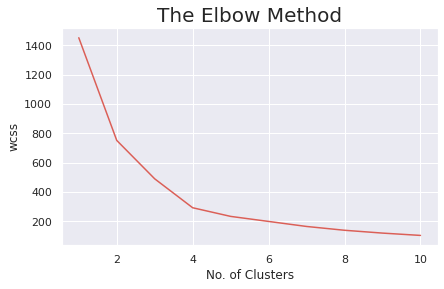

In [370]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Data)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

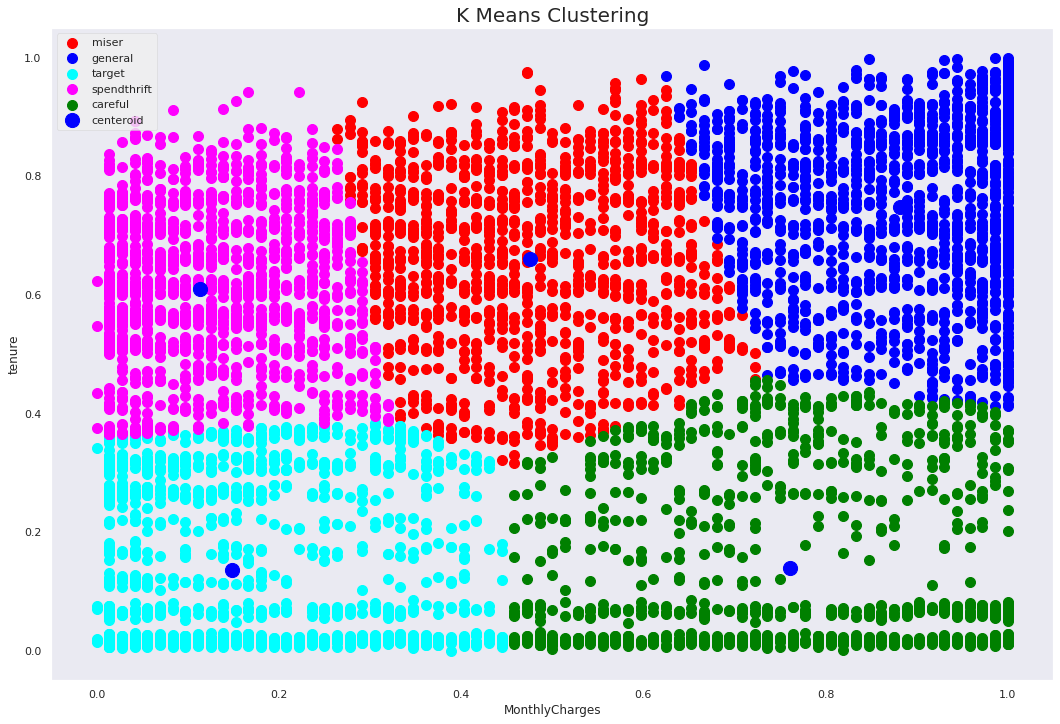

In [371]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Data)
Data = np.array(Data) 
# solution, convert the dataframe to a np.array
#Visualizing the clusters for k=4

plt.figure(figsize=(16,12))
plt.scatter(Data[y_means == 0, 0], Data[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(Data[y_means == 1, 0], Data[y_means == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(Data[y_means == 2, 0], Data[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(Data[y_means == 3, 0], Data[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(Data[y_means == 4, 0], Data[y_means == 4, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200 , c =  'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
plt.legend()
plt.grid()
plt.show()

In [372]:
y_means

array([2, 0, 2, ..., 2, 3, 1], dtype=int32)

In [373]:
len(df2)

7032

In [374]:
len(y_means)

7043

In [0]:
k_means_groups = pd.DataFrame(y_means)

In [376]:
df2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
df2['Churn'] = df2['Churn'].map(dict( No = 0, Yes = 1 ))

In [378]:
df2['Churn'].unique()

array([0, 1])

In [379]:
df2.head()

,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn,NetCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,29.850000
1,0,1,1,0,1,0,1,0,0,0,1,1,0,55.573529
2,0,1,1,0,1,1,0,0,0,0,0,1,1,54.075000
3,0,0,0,0,1,0,1,1,0,0,1,2,0,40.905556
4,0,1,1,1,0,0,0,0,0,0,0,0,1,75.825000


In [380]:
k_means_groups.isnull().sum()
#df2.isnull().sum()


0    0
dtype: int64

In [0]:
k_means_groups.rename(columns = {0:'k_means_groups'}, inplace = True)

In [382]:
k_means_groups

,k_means_groups
0,2
1,0
2,2
3,4
4,3
...,...
7038,0
7039,1
7040,2
7041,3


In [0]:
df3 = df2

In [0]:
df3["k_means_groups"] = k_means_groups

In [385]:
df3.isna().sum()

SeniorCitizen       0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
Churn               0
NetCharges          0
k_means_groups      0
dtype: int64

**adding the k_means_groups as new column**

In [386]:
df3.head()

,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn,NetCharges,k_means_groups
0,0,0,0,0,0,1,0,0,0,0,0,0,0,29.850000,2
1,0,1,1,0,1,0,1,0,0,0,1,1,0,55.573529,0
2,0,1,1,0,1,1,0,0,0,0,0,1,1,54.075000,2
3,0,0,0,0,1,0,1,1,0,0,1,2,0,40.905556,4
4,0,1,1,1,0,0,0,0,0,0,0,0,1,75.825000,3


In [387]:
df3.isna().sum().sum()

0

In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   PhoneService      7032 non-null   int64  
 2   MultipleLines     7032 non-null   int64  
 3   InternetService   7032 non-null   int64  
 4   OnlineSecurity    7032 non-null   int64  
 5   OnlineBackup      7032 non-null   int64  
 6   DeviceProtection  7032 non-null   int64  
 7   TechSupport       7032 non-null   int64  
 8   StreamingTV       7032 non-null   int64  
 9   StreamingMovies   7032 non-null   int64  
 10  Contract          7032 non-null   int64  
 11  PaymentMethod     7032 non-null   int64  
 12  Churn             7032 non-null   int64  
 13  NetCharges        7032 non-null   float64
 14  k_means_groups    7032 non-null   int32  
dtypes: float64(1), int32(1), int64(13)
memory usage: 1.1 MB


# **Evaluation Metric**


1.   **Since our Data is not balanced if we choosing Accuacy as evaluation metric will not help. In our Data set we have 26% observations are under Churn = Yes, lets say our model classifies all observations as No churn including these 26%  observation, Which is the worst possible model and even in this senario the accuracy of the model would be aroud 74% and hence we dont choose accuracy as our metric**

2.   **In our case prioritizing false negatives is relatively more important, because false negatives are those observations in which prediction is churn = NO, but actual value is Churn =yes, more number of false negatives means we are not identifiying customers who want to leave and hence may loose our customer to compititors and hence we Focus on Recall as our evaluation metric**

3.   **Though false positives are not catestrophic , beacuse false positives means our model wrongly predicted customes who actually does not want to churn as will churn, in such senarious we may give some offers or insentives to customers whi are satisfied with services and do not want to leave, Though this will not have major negative impact but may lead to wastage of our marketing expenses and we must also keep an eye on false positives as well and therefore we also focus on  F1 score, which is the harmonic mean of precision and recall.** 





# Modeling

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

In [389]:
df3['NetCharges'].unique()

array([ 29.85      ,  55.57352941,  54.075     , ...,  31.49545455,
        76.65      , 103.70454545])

In [0]:
df_1 = df3 

In [0]:
X = df_1.drop(['Churn'],axis = 1)
y = df_1['Churn']

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_1['Churn'],test_size=0.3, random_state=10)
X_test.shape

(2110, 14)

**since the continuous independent variable in our dataset doesnot have normal distribution we are standardizing our data which will scale all the variables of our data between o and 1.**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [396]:
X_train.shape

(4922, 14)

In [397]:
y_train.shape

(4922,)

In [483]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['XgBoostClassifier :', XGBClassifier()],
               ['Random Forest :', RandomForestClassifier()]]


#predictions_df = pd.DataFrame()
#predictions_df['actual_labels'] = y_test

recall_df = pd.DataFrame(columns=['name','recall score'])
f1_df = pd.DataFrame(columns=['name','f1 score'])

for name,classifier in classifiers:
    clf = classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    #predictions_df[name.strip(" :")] = predictions
    recall_s = recall_score(y_test, predictions)
    f1_s = f1_score(y_test, predictions)
    print(name, recall_s)
    recall_df = recall_df.append({'name':name,'recall score':recall_s},ignore_index=True)
    f1_df = f1_df.append({'name':name,'f1 score':f1_s},ignore_index=True)

DecisionTree : 0.44028520499108736
Naive Bayes : 0.8609625668449198
KNeighbours : 0.46702317290552586
LogisticRegression : 0.49554367201426025
XgBoostClassifier : 0.46345811051693403
Random Forest : 0.40641711229946526


In [484]:
f1_df

,name,f1 score
0,DecisionTree :,0.454044
1,Naive Bayes :,0.596665
2,KNeighbours :,0.502879
3,LogisticRegression :,0.553234
4,XgBoostClassifier :,0.536636
5,Random Forest :,0.458291


In [485]:
recall_df

,name,recall score
0,DecisionTree :,0.440285
1,Naive Bayes :,0.860963
2,KNeighbours :,0.467023
3,LogisticRegression :,0.495544
4,XgBoostClassifier :,0.463458
5,Random Forest :,0.406417


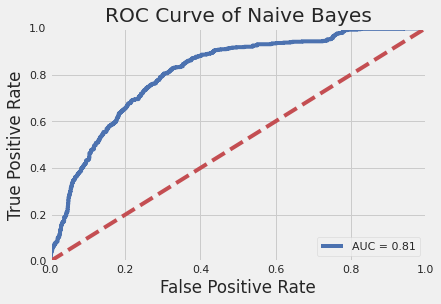

In [482]:
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

y_scores = Gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

#**Hyperparameter** **tuning**

####**Decision Tree**

In [0]:
dt = DecisionTreeClassifier()

In [402]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [403]:
kf = StratifiedKFold(n_splits=3)
param_grid_dt = {'criterion': ['gini', 'entropy'],
              'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
              'max_depth': [5,8,10,15],
              'min_samples_leaf': np.linspace(0.1, 1.0, 10, endpoint=True),
              'max_leaf_nodes': [7,8,9,10,12,15,20]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv= 3, scoring='recall')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [404]:
grid_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dt_tuned = grid_dt.best_estimator_

In [407]:
dt_tuned.fit(X_train,y_train)
dt_pred = dt_tuned.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1549
           1       0.51      0.74      0.60       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.74      0.75      2110



**We can see that we have increased our recall score from 43% to 74% after hyper parameter tuning and even our f1-score is around 0.60, which is really good**

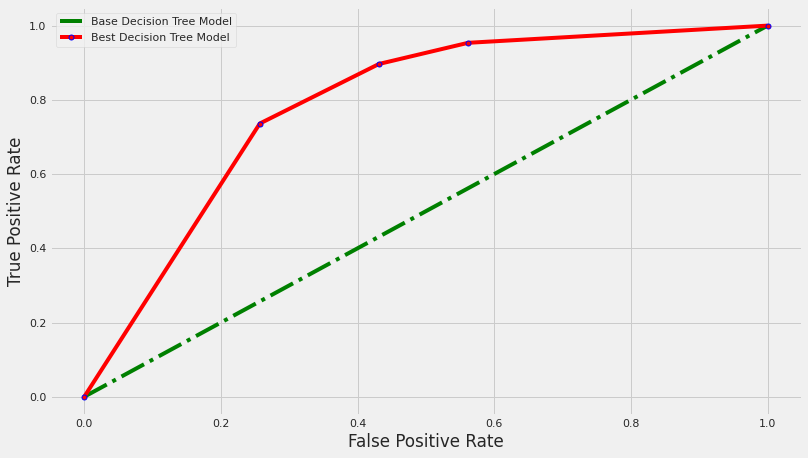

In [408]:
plt.figure(figsize=(12,7))
base_probs = [0 for _ in range(len(y_test))]

best_probs = dt_tuned.predict_proba(X_test)
best_probs = best_probs[:, 1]

base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)
best_fpr, best_tpr, _ = roc_curve(y_test, best_probs)

plt.plot(base_fpr, base_tpr, linestyle='dashdot', label='Base Decision Tree Model',color='Green')
plt.plot(best_fpr, best_tpr, marker='.', label='Best Decision Tree Model',color='Red',markeredgecolor='Blue',markersize=10)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [409]:
base_probs = [0 for _ in range(len(y_test))]

best_probs = dt_tuned.predict_proba(X_test)
best_probs = best_probs[:, 1]

base_auc = roc_auc_score(y_test, base_probs)
best_auc = roc_auc_score(y_test, best_probs)

print('Base Decision Tree Model: Auc = %.3f' % (base_auc))
print('Best Decision Tree Model: Auc = %.3f' % (best_auc))

Base Decision Tree Model: Auc = 0.500
Best Decision Tree Model: Auc = 0.786


**Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s., in our senario we have Auc of 0.78 which means our model is reasonably good in distinguishing between classes**

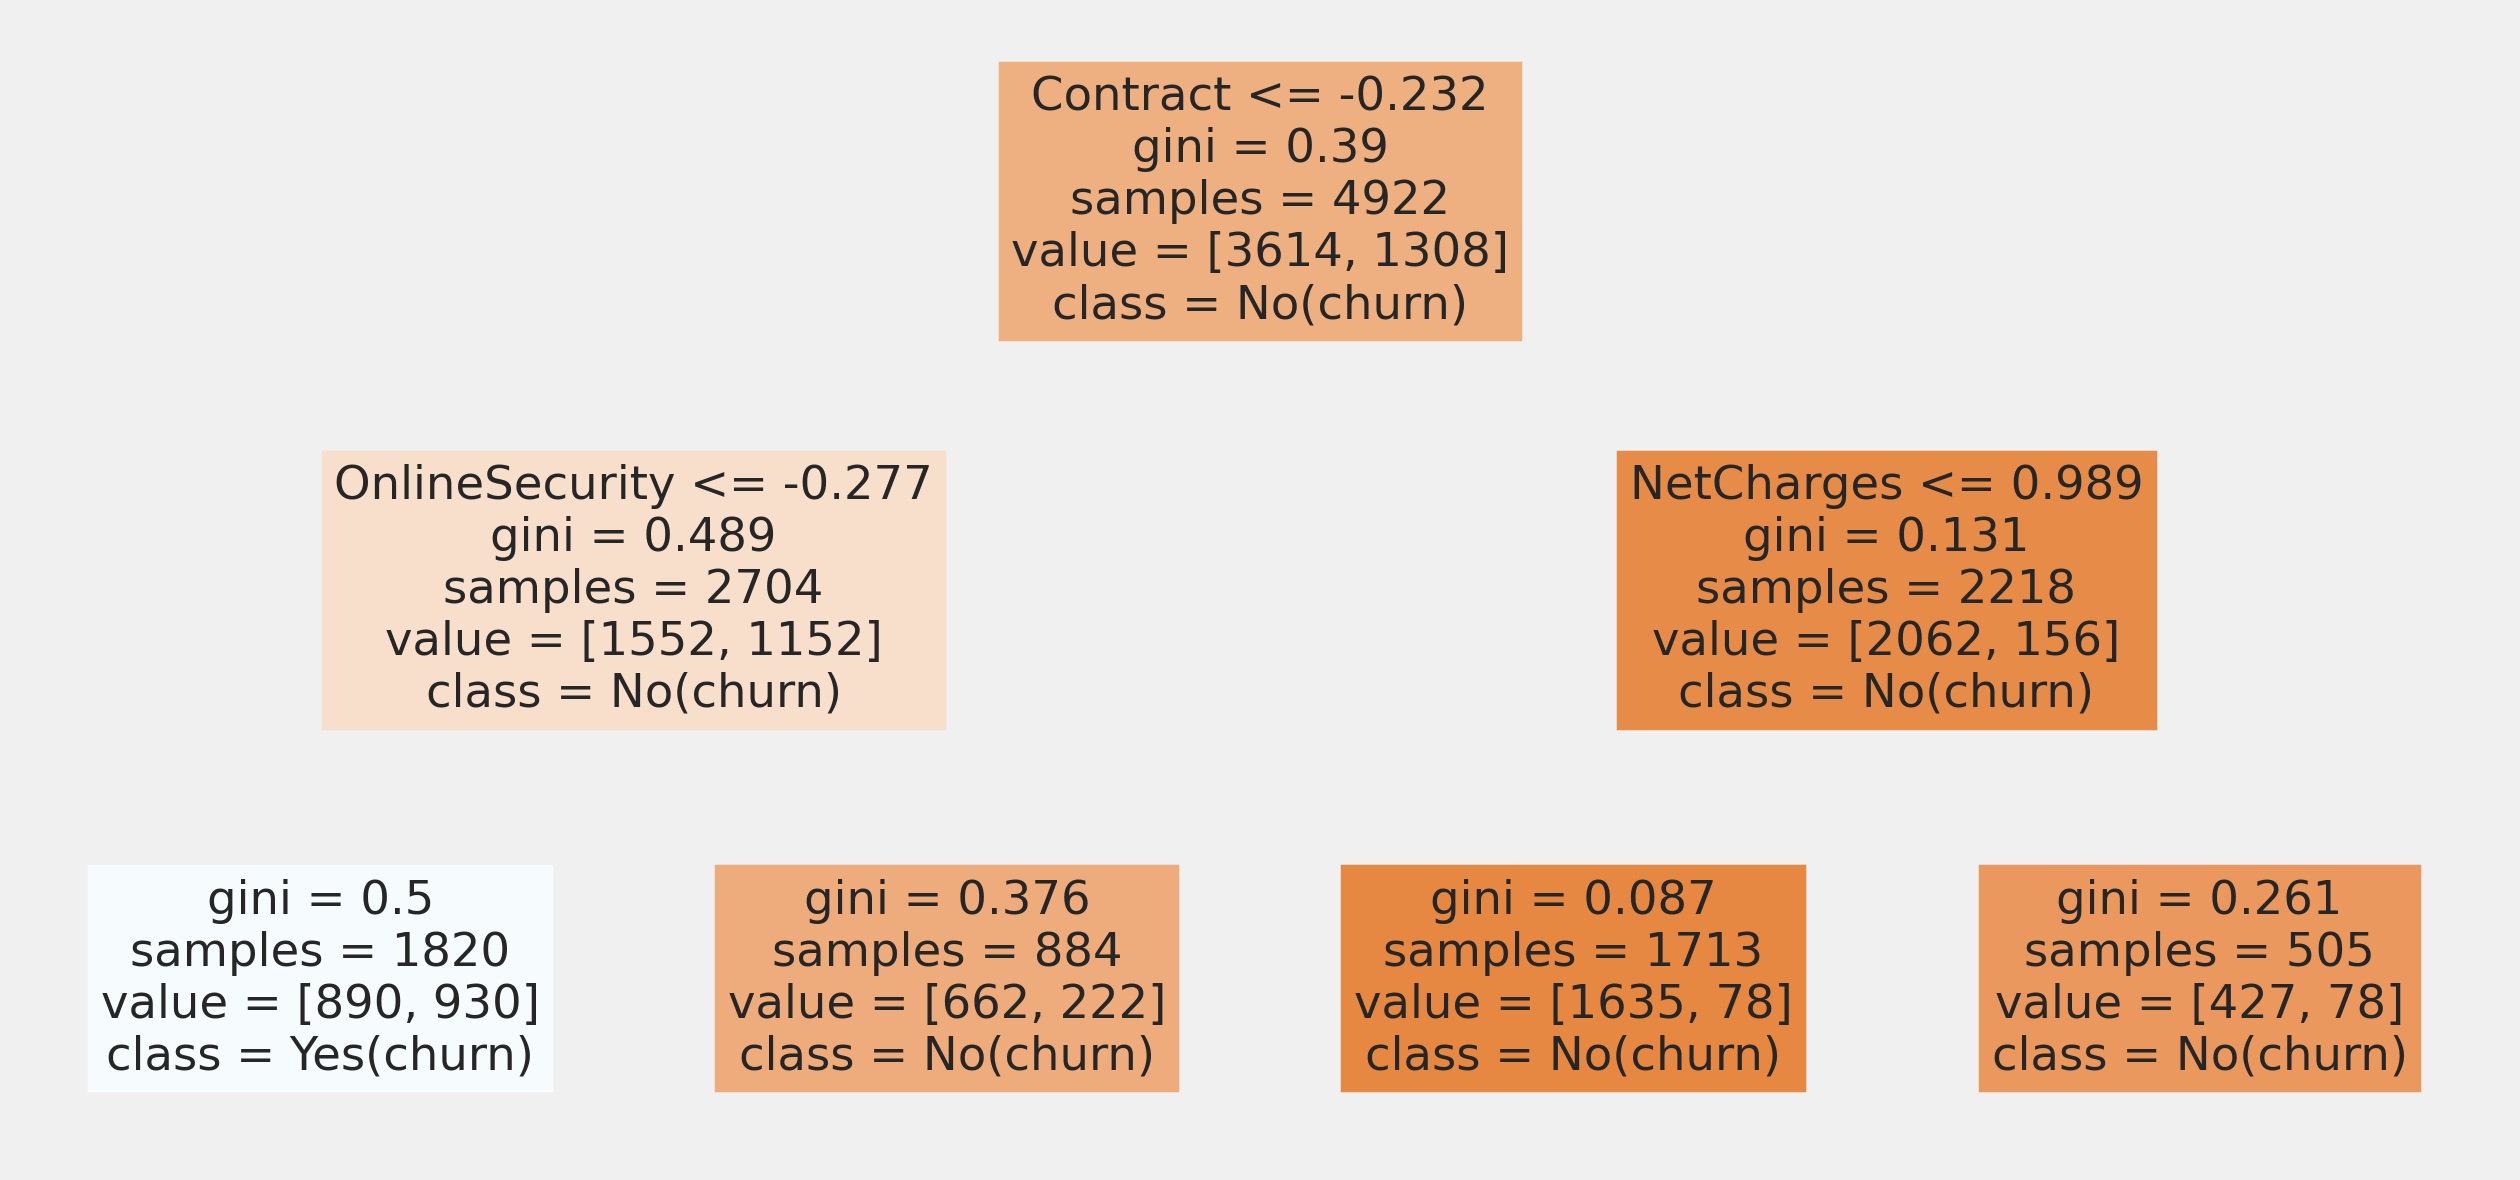

In [410]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(dt_tuned,filled=True,feature_names=X.columns,class_names=['No(churn)','Yes(churn)'])
plt.show()

SeniorCitizen       0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.201925
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.774820
PaymentMethod       0.000000
NetCharges          0.023255
k_means_groups      0.000000
dtype: float64


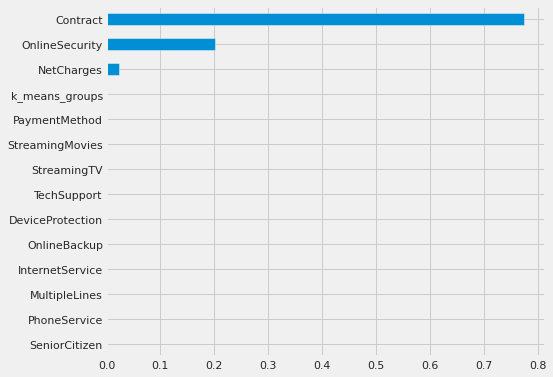

In [411]:
feature_importances = pd.Series(dt_tuned.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

#### **Xg Boost**

In [0]:
from xgboost import XGBClassifier
xg =  XGBClassifier()

In [425]:
kf = StratifiedKFold(n_splits=3)
param_grid_xg = {"learning_rate"    : [0.05, 0.10, 0.15 ] ,
                  "max_depth"        : [ 5, 6, 8,15],
                  "min_child_weight" : [ 1, 3, 5, 7 ],
                  "gamma"            : [ 0.0, 0.1 ],
                  "colsample_bytree" : [ 0.3, 0.4, 0.5 ] }
grid_xg = GridSearchCV(xg, param_grid_xg, cv= 3, scoring='recall')
grid_xg.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'gamma': [0.0, 0.1],
                         'learning_rate': [0.05, 0.1, 0.15],
        

In [426]:
from sklearn.model_selection import GridSearchCV
grid_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xg_tuned = grid_xg.best_estimator_

In [428]:
xg_tuned.fit(X_train,y_train)
xg_pred = xg_tuned.predict(X_test)
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



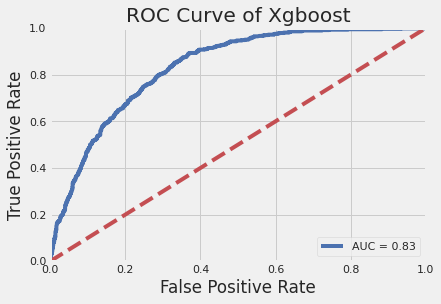

In [479]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt



y_scores = xg_tuned.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Xgboost')
plt.show()

#### **KNN**

In [421]:
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 2
Best p: 2
Best n_neighbors: 8


In [422]:
best_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
knn_tuned = best_model.best_estimator_

In [424]:
knn_tuned.fit(X_train,y_train)
knn_pred = knn_tuned.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1549
           1       0.58      0.36      0.44       561

    accuracy                           0.76      2110
   macro avg       0.69      0.63      0.65      2110
weighted avg       0.74      0.76      0.74      2110



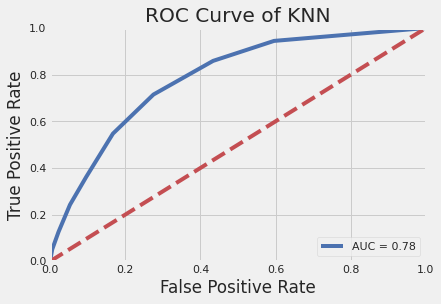

In [480]:
y_scores = knn_tuned.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

**Random Forest**

In [0]:
kf1 = 3


In [487]:
rf = RandomForestClassifier()

param_grid_rf ={'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall',verbose=1,n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [488]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_tuned = grid_rf.best_estimator_

In [491]:
rf_tuned.fit(X_train,y_train)
rf_pred = rf_tuned.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1549
           1       0.66      0.41      0.50       561

    accuracy                           0.79      2110
   macro avg       0.73      0.67      0.68      2110
weighted avg       0.77      0.79      0.77      2110



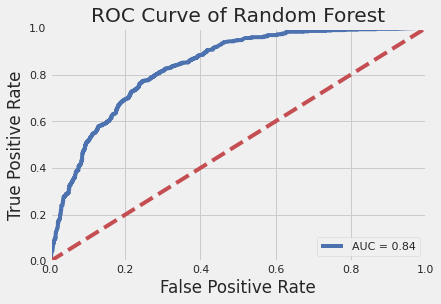

In [492]:
y_scores = rf_tuned.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

### logistic regression

In [0]:
LRModel = LogisticRegression()

In [0]:
param_grid = {"C":np.arange(1,100,0.5), "penalty":["l1","l2"],'solver' : ['lbfgs','liblinear'],'max_iter' : [100, 1000,2500]}

In [0]:
clf_lg = GridSearchCV(LRModel, param_grid = param_grid, cv = 3,scoring='recall', verbose=True, n_jobs=-1)

In [446]:
best_clf = clf_lg.fit(X_train,y_train)

Fitting 3 folds for each of 2376 candidates, totalling 7128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 7128 out of 7128 | elapsed:   58.6s finished


In [0]:
best_lgmodel = best_clf.best_estimator_ 

In [449]:
from sklearn.metrics import precision_score,recall_score
best_lgmodel.fit(X_train,y_train)
lg_pred = best_lgmodel.predict(X_test)
print(recall_score(y_test,lg_pred))

0.49554367201426025


In [451]:
 f1_score
 print(f1_score(y_test,lg_pred))

0.5537848605577689


In [450]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.50      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



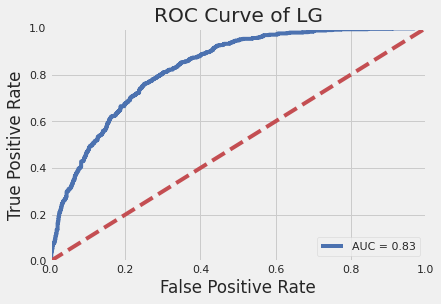

In [481]:
y_scores = best_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LG')
plt.show()

# ANN

In [467]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(14, )))
#model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.output_shape

(None, 1)

In [468]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics= ['accuracy'] )

In [470]:
model_history_1 = model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size= 500, nb_epoch = 20)

Train on 4922 samples, validate on 2110 samples
Epoch 1/20
4922/4922 [==============================] - 0s 63us/step - loss: 0.7162 - accuracy: 0.4376 - val_loss: 0.7079 - val_accuracy: 0.4758
Epoch 2/20
4922/4922 [==============================] - 0s 7us/step - loss: 0.7052 - accuracy: 0.5049 - val_loss: 0.6982 - val_accuracy: 0.5384
Epoch 3/20
4922/4922 [==============================] - 0s 5us/step - loss: 0.6959 - accuracy: 0.5731 - val_loss: 0.6898 - val_accuracy: 0.6066
Epoch 4/20
4922/4922 [==============================] - 0s 5us/step - loss: 0.6877 - accuracy: 0.6126 - val_loss: 0.6822 - val_accuracy: 0.6483
Epoch 5/20
4922/4922 [==============================] - 0s 5us/step - loss: 0.6800 - accuracy: 0.6575 - val_loss: 0.6751 - val_accuracy: 0.6825
Epoch 6/20
4922/4922 [==============================] - 0s 5us/step - loss: 0.6729 - accuracy: 0.6794 - val_loss: 0.6686 - val_accuracy: 0.6995
Epoch 7/20
4922/4922 [==============================] - 0s 5us/step - loss: 0.6664 - ac

In [0]:
model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [472]:
model_history_2 = model.fit(X_train, y_train,validation_data=(X_test, y_test), nb_epoch = 20)

Train on 4922 samples, validate on 2110 samples
Epoch 1/20
4922/4922 [==============================] - 0s 75us/step - loss: 0.5516 - accuracy: 0.7343 - val_loss: 0.5251 - val_accuracy: 0.7341
Epoch 2/20
4922/4922 [==============================] - 0s 50us/step - loss: 0.5056 - accuracy: 0.7385 - val_loss: 0.4737 - val_accuracy: 0.7517
Epoch 3/20
4922/4922 [==============================] - 0s 51us/step - loss: 0.4570 - accuracy: 0.7769 - val_loss: 0.4442 - val_accuracy: 0.7777
Epoch 4/20
4922/4922 [==============================] - 0s 48us/step - loss: 0.4433 - accuracy: 0.7865 - val_loss: 0.4381 - val_accuracy: 0.7806
Epoch 5/20
4922/4922 [==============================] - 0s 51us/step - loss: 0.4375 - accuracy: 0.7940 - val_loss: 0.4348 - val_accuracy: 0.7867
Epoch 6/20
4922/4922 [==============================] - 0s 48us/step - loss: 0.4336 - accuracy: 0.7958 - val_loss: 0.4341 - val_accuracy: 0.7863
Epoch 7/20
4922/4922 [==============================] - 0s 48us/step - loss: 0.431

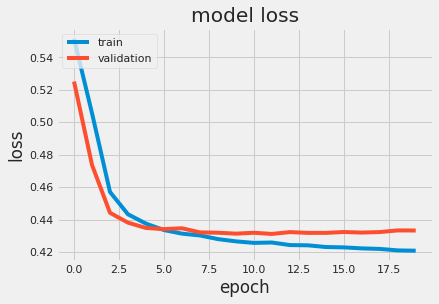

In [475]:
plt.plot(model_history_2.history['loss'])
plt.plot(model_history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

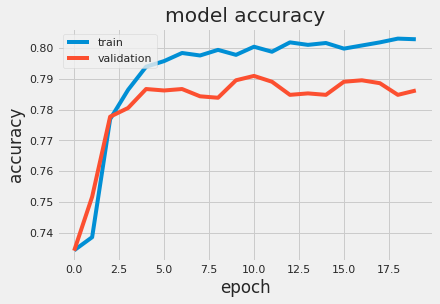

In [477]:
# summarize history for accuracy
plt.plot(model_history_2.history['accuracy'])
plt.plot(model_history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
X = df_1.drop(['Churn'],axis=1)
y = df_1['Churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [138]:
param_grid_gbm = {'learning_rate': np.arange(0.02, 0.1, 0.02),
                  'n_estimators': [400, 600, 800, 1000]}
                  #'max_depth': range(2, 5)}
grid_gbm = GridSearchCV(AdaBoostClassifier(), param_grid_gbm,cv=kf1, scoring='recall', n_jobs= -1, verbose = 2)
grid_gbm.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.02, 0.04, 0.06, 0.08]),
                         'n_estimators': [400, 600, 800, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

In [0]:
grid_gbm.best_params_

In [139]:
grid_gbm.best_score_

0.5084097859327218

In [0]:
gb = grid_gbm.best_score_

In [141]:
gb.fit(X_train,y_train)

AttributeError: ignored

In [0]:
gb_pred = gb.predict(X_test)

In [0]:
recall_score(y_test,gb_pred)

0.5151515151515151

In [0]:
param_grid_knn = {'n_neighbors' : list(range(21,31)),
                  'weights': ['uniform','distance'],
                  'algorithm' : ['auto'],'p' : [1,2]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=kf1, scoring='recall',verbose=1,n_jobs=-1)

In [0]:
grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [0]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [0]:
grid_knn.best_score_

0.5496941896024464

In [0]:
knn_tunes = KNeighborsClassifier(algorithm='auto',n_neighbors=21,p=1,weights='uniform')

In [0]:
knn_tunes.fit(X_train,y_train)
knn_pred = knn_tunes.predict(X_test)
print(recall_score(y_test,knn_pred))

0.5401069518716578
